# Gaussian Distribution

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from ipywidgets import *
import IPython.display as display

%matplotlib notebook

In [2]:
n = 150
np.random.seed(123)
x1 = np.random.normal(7,6,size=(n,1))
x2 = x1*1.3 + 4 + np.random.normal(0,6,size=(n,1))
X = np.concatenate((x1,x2),axis=1)
# Centerize
μ = X.mean(axis=0).reshape((1,2))
Y = X - μ
# Transform to new coordinate
cov = np.cov(X.T)
λ, U = linalg.eig(cov)
Z = Y @ U

In [3]:
print('Covarian:\n', cov)
print('Eigenvalues:', λ.real)
print('Eigenvetors:\n', U)
print('Determinant of U:', linalg.det(U))

Covarian:
 [[ 43.08574163  54.48775214]
 [ 54.48775214 101.60163581]]
Eigenvalues: [ 10.49756838 134.18980906]
Eigenvetors:
 [[-0.85821807 -0.51328524]
 [ 0.51328524 -0.85821807]]
Determinant of U: 1.0


In [15]:
def gaussianFunc(pos, mu=[[0,0]], cov=[[1,0],[0,1]]):
    dim = mu.size
    cov_det = linalg.det(cov)
    cov_inv = linalg.inv(cov)
    N = np.sqrt(2*np.pi)**dim*np.sqrt(cov_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, cov_inv, pos-mu)
    return np.exp(-fac / 2) / N

In [16]:
def plotContour(μ, cov, ax, x_range=(-20,20), y_range=(-20,20)):
    n = 100
    x = np.linspace(x_range[0], x_range[1], n)
    y = np.linspace(y_range[0], y_range[1], n)
    X,Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y
    Z = gaussianFunc(pos,μ,cov)
    ax.contourf(X, Y, Z, 10, cmap="RdBu_r", alpha=0.4)

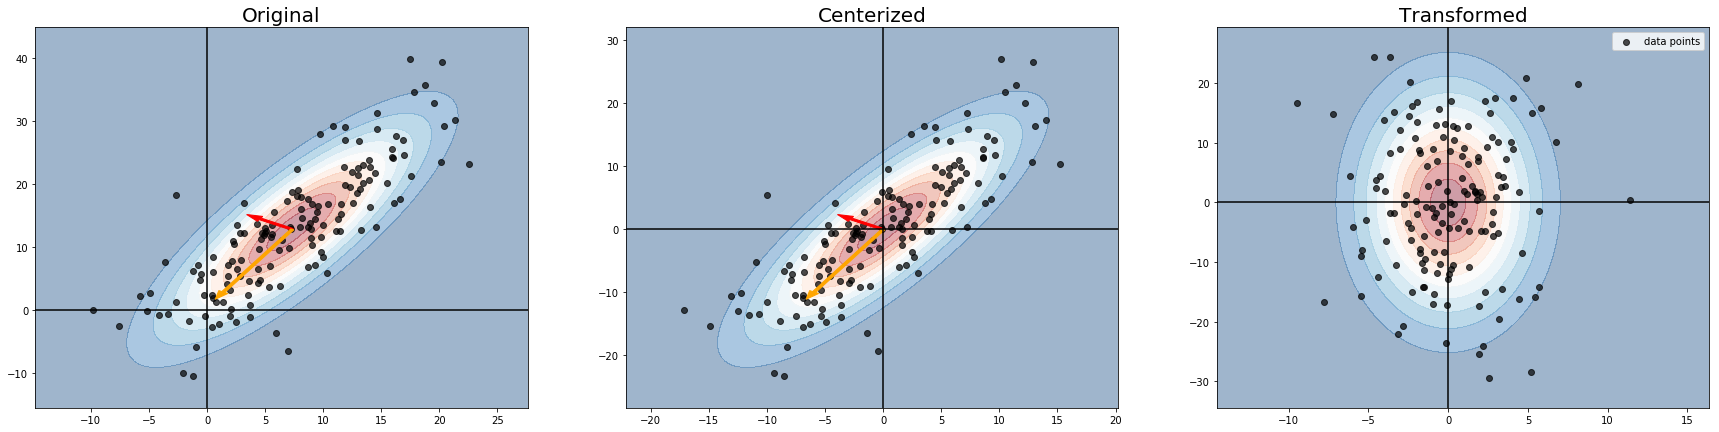

In [17]:
# Plot
n_axis = 3
data = [X,Y,Z]
names = ['Original','Centerized','Transformed']
fig, axs = plt.subplots(1,n_axis, figsize=(10*n_axis,7))
for i in range(n_axis):
    x1 = data[i][:,0]
    x2 = data[i][:,1]
    x_range = (min(x1)-5, max(x1)+5)
    y_range = (min(x2)-5, max(x2)+5)
    x_min, x_max = x_range
    y_min, y_max = y_range
    μ = data[i].mean(axis=0)
    cov = np.cov(data[i].T)
    plotContour(μ, cov, axs[i], x_range, y_range)
    axs[i].scatter(x1, x2, alpha=0.7, label='data points', color='k')
    axs[i].vlines(x=0, ymin=y_min, ymax=y_max)
    axs[i].hlines(y=0, xmin=x_min, xmax=x_max)
    if i != 2:
        axs[i].arrow(x=μ[0], y=μ[1], dx=U[0,0]*np.sqrt(λ[0]), dy=U[1,0]*np.sqrt(λ[0]), width = 0.3, color='red', label='u_1')
        axs[i].arrow(x=μ[0], y=μ[1], dx=U[0,1]*np.sqrt(λ[1]), dy=U[1,1]*np.sqrt(λ[1]), width = 0.3, color='orange', label='u_2')
    axs[i].set_xlim(x_min, x_max)
    axs[i].set_ylim(y_min, y_max)
    axs[i].set_title(names[i], fontsize=20)
plt.legend()
plt.show()

In [7]:
xMeanSlider = FloatSlider(value=0., min=-20., max=20., step=.1, description="x:")
yMeanSlider = FloatSlider(value=0., min=-20., max=20., step=.1, description="y:")
xVarSlider = FloatSlider(value=1., min=0., max=20., step=.1, description="X Variance:")
yVarSlider = FloatSlider(value=1., min=0., max=20., step=.1, description="Y Variance:")

In [12]:
def updatePlot(xMean, yMean, xVar, yVar):
    n = 100
    μ = np.array([[xMean,yMean]])
    cov = np.diag([xVar, yVar])
    np.random.seed(123)
    x = np.random.normal(xMean, np.sqrt(xVar), n)
    y = np.random.normal(yMean, np.sqrt(yVar), n)
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.vlines(x=0, ymin=-20, ymax=20)
    ax.hlines(y=0, xmin=-20, xmax=20)
    plotContour(μ, cov, ax)
    ax.scatter([xMean],[yMean], color='red')
    ax.scatter(x, y, alpha=0.7, label='data points', color='k')
    plt.show()

In [13]:
interact(updatePlot, xMean=xMeanSlider, yMean=yMeanSlider, xVar=xVarSlider, yVar=yVarSlider)

interactive(children=(FloatSlider(value=7.9, description='x:', max=20.0, min=-20.0), FloatSlider(value=-2.5, d…

<function __main__.updatePlot>

In [14]:
xMeanSlider.value

3.5